In [52]:
%matplotlib inline

In [53]:
import math
import matplotlib.pyplot as plt
import random
import statistics as st
import seaborn as sns
import numpy as np

In [54]:
class Player:

    def __init__(self, name):
        self.name = name
        self.total_score = 0
        self.turn_score = 0
        self.num_of_rolls = 0

    def get_roll(self):
        self.num_of_rolls += 1
        return random.randint(1, 6)

    def should_roll(self):
        return self.num_of_rolls == 0

    def reset(self):
        self.total_score = 0

    def take_turn(self):
        self.num_of_rolls = 0
        self.turn_score = 0
        while self.should_roll():
            roll = self.get_roll()
            if roll == 1:
                break
            else:
                self.turn_score += roll
        self.total_score += self.turn_score

In [55]:
class TurnPlayer(Player):
    def should_roll(self):
        return self.num_of_rolls < 5

In [56]:
class ScorePlayer(Player):
    def should_roll(self):
        return self.turn_score < 20

In [57]:
class MonsterPlayer(Player):
    def should_roll(self):
        return self.turn_score < 20 and self.num_of_rolls < 5

In [58]:
class Game:
    def __init__(self, players):
        self.players = players
        self.end_total_score = []

    def play(self):
        for _ in range(7):
            for player in self.players:
                player.take_turn()
#             self.show_score()
#         self.end_total_score.append(player.total_score)
        return [player.total_score for player in players]

    def reset(self):
        for player in players:
            player.reset()

#     def show_score(self):
#         for player in self.players:
#             print("{}'s turn score is {}".format(player.name, player.turn_score))
#             print("{}'s total score is {}".format(player.name, player.total_score))

In [59]:
players = [Player("Player"), TurnPlayer("Turn"), ScorePlayer("Score"), MonsterPlayer("Monster")]
game = Game(players)
# game.play()

In [60]:
scores = []
for _ in range(100):
    game.play()
    game.reset()
    scores.append(game.play())


In [61]:
player, turn, score, monster = zip(*scores)


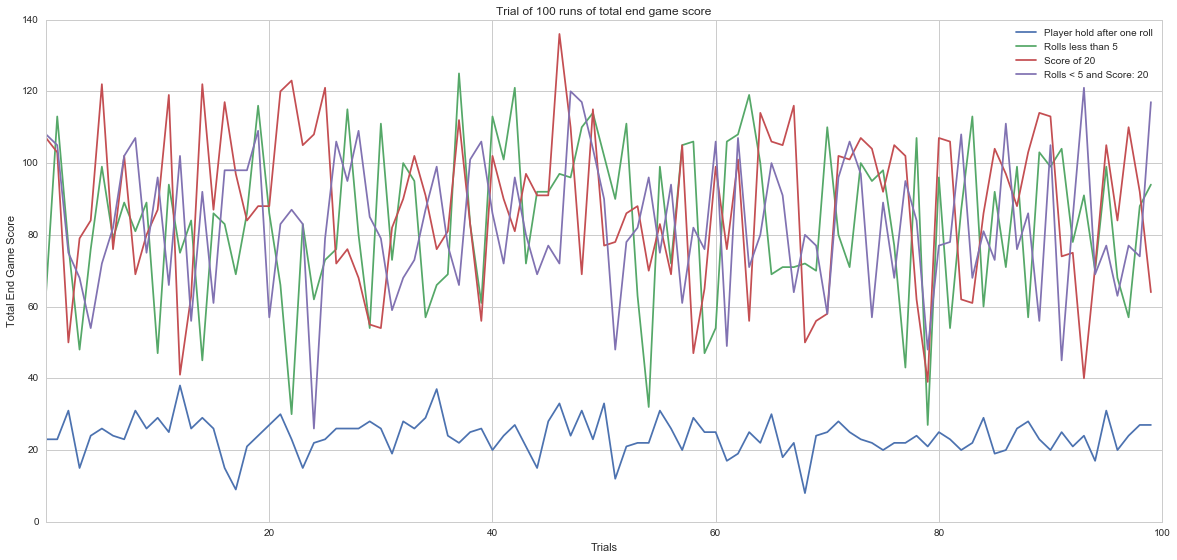

In [62]:
x1 = [20, 40, 60, 80, 100]
y1 = player
y2 = turn
y3 = score
y4 = monster
plt.subplots(figsize=(20, 9))

plt.plot(y1)
plt.plot(y2)
plt.plot(y3)
plt.plot(y4)

plt.xticks(x1)
plt.xlabel('Trials')
plt.ylabel('Total End Game Score')
plt.title('Trial of 100 runs of total end game score')
plt.legend(["Player hold after one roll", "Rolls less than 5", "Score of 20", "Rolls < 5 and Score: 20"], loc='upper right')


plt.show()

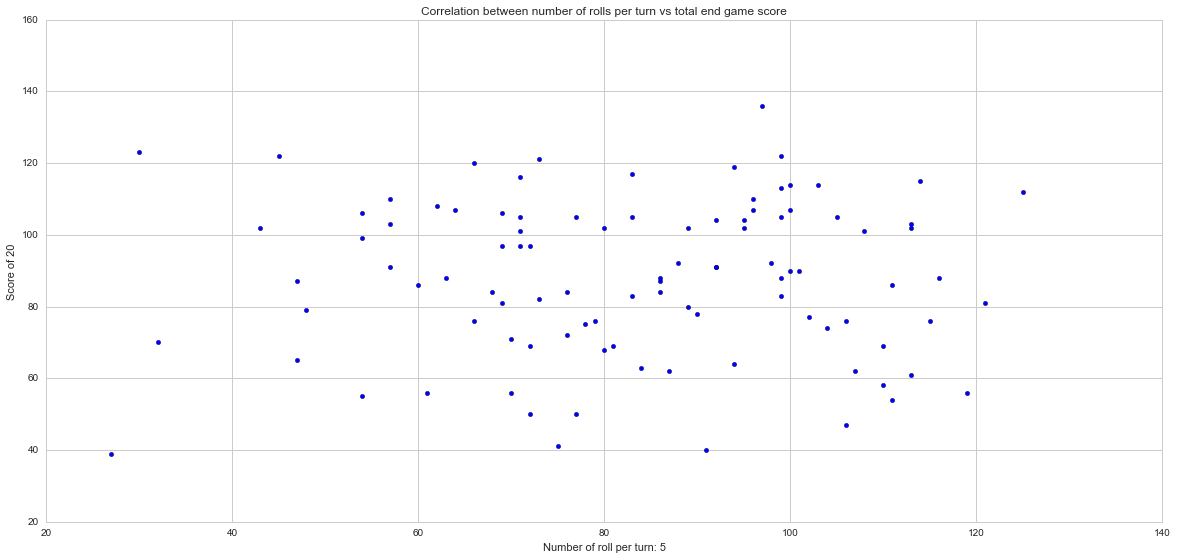

In [63]:
x1 = turn
y1 = score

plt.subplots(figsize=(20, 9))
plt.scatter(x1, y1)

plt.xlabel("Number of roll per turn: 5")
plt.ylabel("Score of 20")
plt.title('Correlation between number of rolls per turn vs total end game score')
plt.show()

In [64]:
scores = []
for _ in range(1000):
    game.play()
    game.reset()
    scores.append(game.play())

In [65]:
player1, turn1, score1, monster1 = zip(*scores)

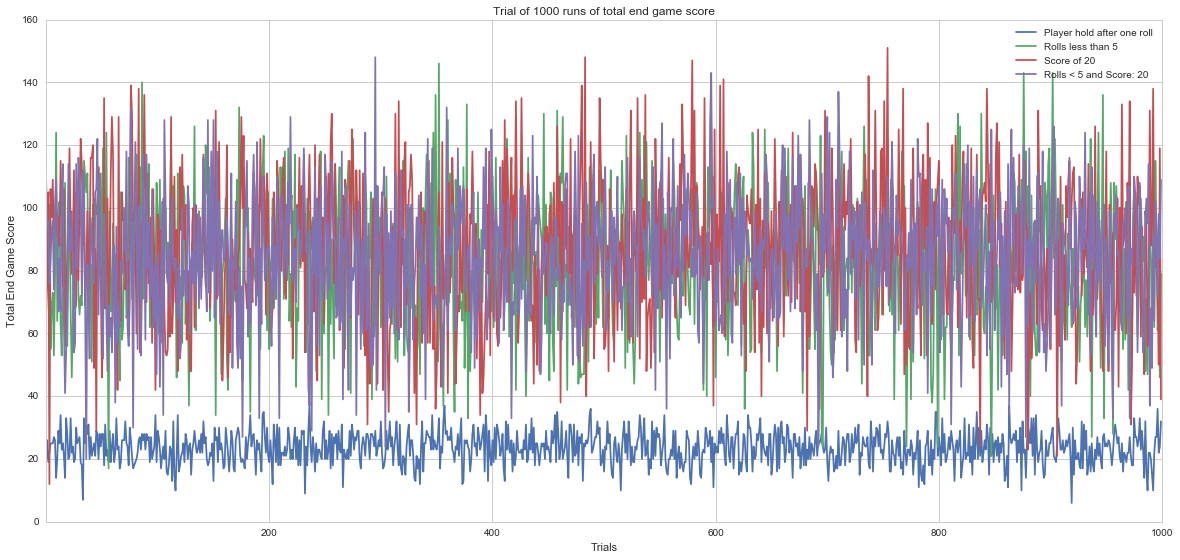

In [66]:
x1 = [200, 400, 600, 800, 1000]
y1 = player1
y2 = turn1
y3 = score1
y4 = monster1
plt.subplots(figsize=(20, 9))

plt.plot(y1)
plt.plot(y2)
plt.plot(y3)
plt.plot(y4)

plt.xticks(x1)
plt.xlabel('Trials')
plt.ylabel('Total End Game Score')
plt.title('Trial of 1000 runs of total end game score')
plt.legend(["Player hold after one roll", "Rolls less than 5", "Score of 20", "Rolls < 5 and Score: 20"], loc='upper right')


plt.show()

In [77]:
meanplayer, stdevplayer = st.mean(player1), round(st.stdev(player1),2)
meanturn, stdevturn = st.mean(turn1), round(st.stdev(turn1),2)
meanscore, stdevscore = st.mean(score1), round(st.stdev(score1),2)
meanmonster, stdevmonster = st.mean(monster1), round(st.stdev(monster1),2)

print(meanplayer, stdevplayer)

23.613 5.19


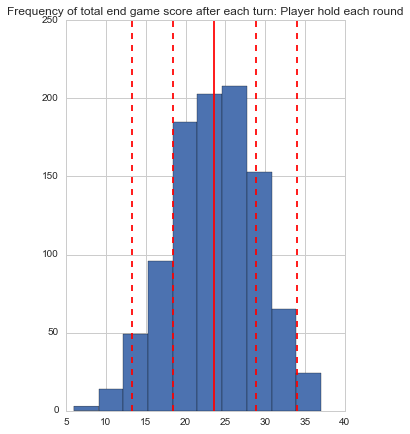

In [83]:
plt.subplots(figsize=(5, 7))
plt.hist(player1)
mean = st.mean(player1)
stdev = st.stdev(player1)
ymin, ymax = plt.ylim()


plt.vlines(mean, ymin, ymax, color='red')
plt.vlines([mean - 2 * stdev, mean - stdev, mean + stdev, mean + 2 * stdev], ymin, ymax, color='red', linestyles='dashed')
plt.title('Frequency of total end game score after each turn: Player hold each round')
plt.show()

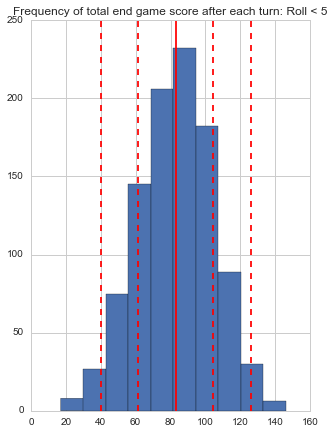

In [84]:
plt.subplots(figsize=(5, 7))
plt.hist(turn1)
mean = st.mean(turn1)
stdev = st.stdev(turn1)
ymin, ymax = plt.ylim()


plt.vlines(mean, ymin, ymax, color='red')
plt.vlines([mean - 2 * stdev, mean - stdev, mean + stdev, mean + 2 * stdev], ymin, ymax, color='red', linestyles='dashed')
plt.title('Frequency of total end game score after each turn: Roll < 5')
plt.show()

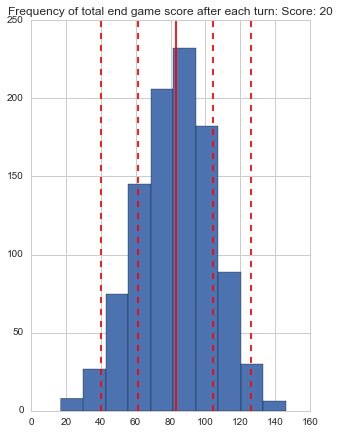

In [88]:
plt.subplots(figsize=(5, 7))
plt.hist(turn1)
mean = st.mean(turn1)
stdev = st.stdev(turn1)
ymin, ymax = plt.ylim()

plt.vlines(mean, ymin, ymax, color='red')
plt.vlines([mean - 2 * stdev, mean - stdev, mean + stdev, mean + 2 * stdev], ymin, ymax, color='red', linestyles='dashed')
plt.title('Frequency of total end game score after each turn: Score: 20')
plt.show()

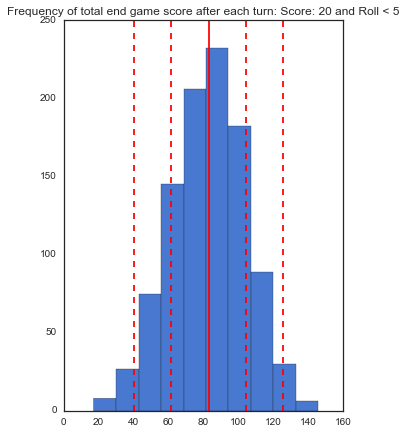

In [89]:
plt.subplots(figsize=(5, 7))
plt.hist(turn1)
mean = st.mean(turn1)
stdev = st.stdev(turn1)
ymin, ymax = plt.ylim()

sns.set(style="white", palette="muted", color_codes=True)

plt.vlines(mean, ymin, ymax, color='red')
plt.vlines([mean - 2 * stdev, mean - stdev, mean + stdev, mean + 2 * stdev], ymin, ymax, color='red', linestyles='dashed')
plt.title('Frequency of total end game score after each turn: Score: 20 and Roll < 5')
plt.show()